<a href="https://colab.research.google.com/github/radicalcoder/ML-Project/blob/master/TrafficSignRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Automatic Traffic Sign Recognition For Automated Car**

### **Prof. Ravi Kothari, Machine Learning**

**December 1st, 2019**

**Presented By: Dhruv Sabharwal, Yash Dixit and Harpreet Virk**



# **Abstract**
### **Motive:** 
**This project deals with building a crucial component of driverless cars viz. automatic traffic sign recognition. The model uses the Belgium TS dataset for this purpose.**

### **Introduction**

By applying machine learning to automatic traffic sign recognition problem, we created a model that reliably classifies traffic signs by learning to identify even the most complex features. The dataset is split into training and testing data and has the following characteristics:

1.   The image size originally are inconsistent  but then reshaped to 32 (width) x 32 (height) x 3(RGB color channels).
2.   The training data set contains 62 unique labels with 4575 images.
3.   The testing dataset contains 53 unique labels with 2520 images.

The model can identify traffic signs with around 90.1 percent accuracy on the testing data set. This report provides a comprehensive outline along with the relevant code snippets on the traffic sign detection and classification. 

The details of the convolutional neural network (CNN)  methods that have been used to construct and train the model as well as their specifications are summarised in the following pages with use of visualisation in terms of graphs and a confusion matrix. 

The shortcomings of the model, such as predicting two almost similar looking labels as one or the other, have also been presented and discussed at length. 

The conclusion to the model's predictions and classification and the effect of various chosen parametres on the final accuracy are provided towards the end of report and methods that helped alter the accuracy have also been highlighted. 



### **Terms Of References:**

Briefly states the purpose and scope of the report. This includes who requested the report, the main issues or problems to be identified, the reason for undertaking the report and the due date of the report.




## **Procedure**

The implementation focuses on first reading the data and putting it into two lists, namely labels and images. 

We read the data by cloning it from our github repository: https://github.com/radicalcoder/ML-Project

In [2]:
import os
import matplotlib
%matplotlib inline
!git clone -l -s https://github.com/radicalcoder/ML-Project.git data
%cd data
!ls

Cloning into 'data'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 7445 (delta 55), reused 0 (delta 0), pack-reused 7349
Receiving objects: 100% (7445/7445), 257.59 MiB | 36.93 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Checking out files: 100% (7227/7227), done.
/content/data
BelgiumTSC_Testing	      ML_Project.ipynb
BelgiumTSC_Training	      README.md
MLP_final_initialdraft.ipynb  traffic.py
MLP.ipynb		      TrafficSignRecognitionReport.ipynb


The data set is read into two lists, as follows:

1. list labels : a list of numbers, where each number represents a unique image label.

2. list images : a list of arrays, where each array represents a single image.
    
The data set directory contains multiple subdirectories. We read all these subdirectories into a list subdirs. Since the subfolders are read in a random order, the list is also in a random order. 

In [3]:
import skimage
import skimage.data
import skimage.transform
def data_loader(data_dir):

    subdirs = []
    for i in os.listdir(data_dir):
      if os.path.isdir(data_dir + i):   # There may be non image files/directories in the data_dir hence we need to check
        subdirs.append(i)
    #subdirs.sort()
    #Data is now collected into two lists - labels & images - while looping through the list subdirs[].    
    labels = []
    images = []
    for i in subdirs:
        label_dir = data_dir + i
        #print(label_dir)
        f_names=[]
        for f in os.listdir(label_dir):
          if f.endswith(".ppm"):   # only files that end in .ppm are image files
            f_names.append(label_dir + '/' + f)
        # print(f_names)
        #Now for each label, we append all its images into the list images[] and append its label number in the list labels[]. 
        for f in f_names:
            images.append(skimage.data.imread(f))   #use parameter as_grey??
            labels.append(int(i))
    return labels, images

# Loading the training and testing dataset using the function data_loader().
training_data_dir = "BelgiumTSC_Training/Training/"
testing_data_dir = "BelgiumTSC_Testing/Testing/"
training_labels, training_images = data_loader(training_data_dir)
testing_labels, testing_images = data_loader(testing_data_dir)
print(set(training_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


The images and their labels are then combined together using the zip function in python so as to map each image to its unique image label. 

The training data is then shuffled to reduce significant imbalance across classes in the training set. A lack of shuffling data could mean our model is biased towards classes which have representation initially in the training data, especially when it is unsure in its predictions. 


In [4]:
import random
#Creating an iteration object of tupules (zip) which matches images with their labels in every tupule
shuff_train = list(zip(training_images, training_labels))
#Shuffling the image-label pairs in our zip object
random.shuffle(shuff_train)
#Unzipping the images and labels after shuffling is done
training_images, training_labels = zip(*shuff_train)
training_images=list(training_images)
training_labels=list(training_labels)
#Creating an iteration object of tupules (zip) which matches images with their labels per tupule
shuff_test = list(zip(testing_images, testing_labels))
#Shuffling the image-label pairs in our zip object
random.shuffle(shuff_test)
#Unzipping the images and labels after shuffling is done
testing_images, testing_labels = zip(*shuff_test)
testing_images=list(testing_images)
testing_labels=list(testing_labels)
print("Number of unique labels in Training Data: ", len(set(training_labels)), "\nTotal number of Images in Training Data: ", len(training_images)) 
print("Number of unique labels in Testing Data: ", len(set(testing_labels)), "\nTotal number of Images in Testing Data: ", len(testing_images))

Number of unique labels in Training Data:  62 
Total number of Images in Training Data:  4575
Number of unique labels in Testing Data:  53 
Total number of Images in Testing Data:  2520


We now create a function to display our images along with their labels. After running the below code, you can see a sample of the images from the dataset, with their labels displayed: 

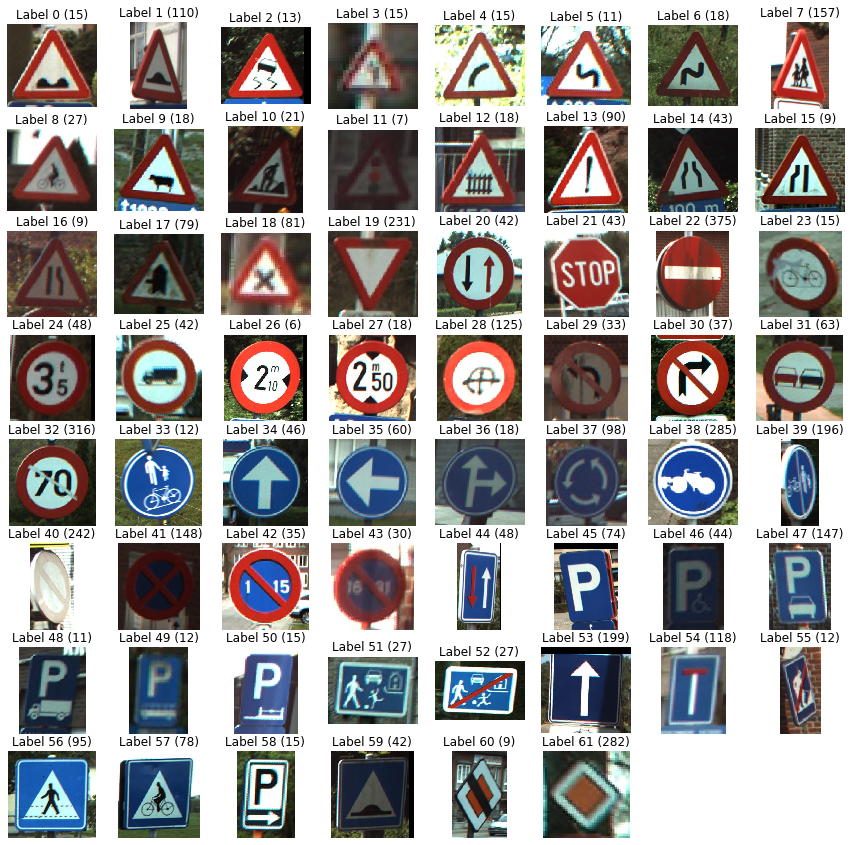

In [5]:
import matplotlib.pyplot as plt
def display_images_and_labels(images, labels):
    #Display the first image of each label.
    unique_labels = set(labels) #Grouping same labels together
    plt.figure(figsize=(15, 15)) #Sets the size of figure which will contain all images displayed to 15x15 inches
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns in the 15x15 inch plot figure created above
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image,cmap="gray")
    plt.show()
display_images_and_labels(training_images, training_labels)

We now move towards converting our images into similar size. This is implemented as all our images had inconsistent size initially and working on  different sized image data set would be almost detrimental to the CNN network that we created.



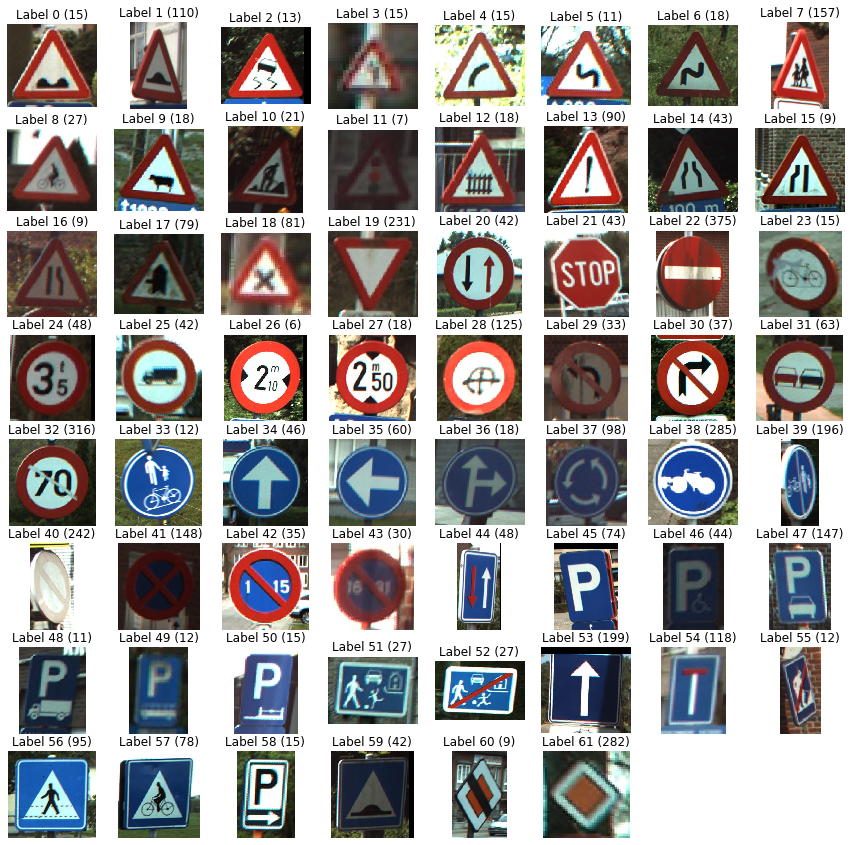

In [6]:
import numpy as np
#Training Data
#Reshaping the images to 32x32 px
reshape_images_training=[]
for i in training_images:
  reshape_images_training.append(skimage.transform.resize(i,(32,32), mode ='constant'))
reshape_images_training= np.array(reshape_images_training) #Keras requires our images and labels to be in numpy arrays
#reshape_images_training = reshape_images_training.astype('float32')
#print(reshape_images_training.shape)

#Testing Data
reshape_images_testing=[]
for i in testing_images:
  reshape_images_testing.append(skimage.transform.resize(i,(32,32), mode ='constant'))
reshape_images_testing= np.array(reshape_images_testing) 
#reshape_images_testing = reshape_images_testing.astype('float32')
#print(reshape_images_testing.shape)
display_images_and_labels(training_images,training_labels)
#display_images_and_labels(testing_images, testing_labels)

We now convert our 3 channel (RGB) images (32 x 32 x 3) into a single channel grayscale image (32 x 32 x1). We implement gray scaling of the images to see whether it can help us in better isolating and reducing the noise in each of our images immensely. 

In [8]:
from skimage import io
from skimage import color
#Training Data
#Converting RGB reshaped images to grayscale images
grayscale_images_training=[]
for i in reshape_images_training:
  grayscale_images_training.append(color.rgb2gray(i))
grayscale_images_training= np.array(grayscale_images_training)  #Keras requires our images and labels to be in numpy arrays
#grayscale_images_training = reshape_images_training.astype('float32')
#print("Gray: \n")
#print(grayscale_images_training[0].shape)
image_expanded_training = grayscale_images_training[:, :, :, np.newaxis]  #converting images from 32x32 to 32x32x1 
grayscale_images_training=image_expanded_training
#print(grayscale_images_training[0].shape)
#display_images_and_labels(training_images,training_labels)
#display_images_and_labels(testing_images, testing_labels)

"""
print("Grayscale Training images")
print(len(grayscale_images_training))

for i in grayscale_images_training[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped Training Images ")

for i in reshape_images_training[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))
"""
#Testing Data
grayscale_images_testing=[]
for i in reshape_images_testing:
  grayscale_images_testing.append(color.rgb2gray(i))
grayscale_images_testing= np.array(grayscale_images_testing) 
#grayscale_images_testing = reshape_images_testing.astype('float32')
#print("gray")
#print(grayscale_images_testing[0].shape)
image_expanded_testing = grayscale_images_testing[:, :, :, np.newaxis]  
grayscale_images_testing=image_expanded_testing
#print(grayscale_images_testing[0].shape)
#display_images_and_labels(testing_images,testing_labels)
#display_images_and_labels(grayscale_images_testing, testing_labels)
"""
print("Grayscale testing images")
print(len(grayscale_images_testing))
for i in grayscale_images_testing[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped testing Images ")

for i in reshape_images_testing[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

"""

'\nprint("Grayscale testing images")\nprint(len(grayscale_images_testing))\nfor i in grayscale_images_testing[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\nprint("Reshaped testing Images ")\n\nfor i in reshape_images_testing[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\n'

We introduce **one hot encoding** to stop the model from getting correlations wrong. This is introduced to eliminate label encoding whereby the model might give the higher numbered labels higher weights. 

In [18]:
from keras.utils import to_categorical
import tensorflow as tf

#print(training_labels)
labels_train = to_categorical(training_labels) #one-hot encode training label column
labels_test = to_categorical(testing_labels) #one-hot encode testing label column
#print(labels_train.shape)
#print("\n")
print(type(labels_train))
print(training_labels[500])
print(labels_train[500])

#print(testing_labels)
#print(labels_test.shape)
#print("\n")
print(type(labels_test))
print(testing_labels[500])
print(labels_test[500])

<class 'numpy.ndarray'>
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>
45
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Here an arbitrary training and testing label was provided and the corresponding one hot encoding was output. 


# **----Explain the CNN Here!-----**

In [0]:
import keras
from keras import models
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.preprocessing import image

model_gen = Sequential() #The Sequential model is a linear stack of layers.
# Conv2D - Applies 32 convolution filters of size 3x3 each.
model_gen.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=grayscale_images_training[0].shape))  #When using this layer as the first layer in a model, we provide the keyword argument "input_shape"
#model_gen.add(Conv2D(32, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25)) #To help prevent overfitting
 
model_gen.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu')) # Applies 64 convolution filters of size 3x3 each.
#model_gen.add(Conv2D(64, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25)) #To help prevent overfitting
 
model_gen.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu')) # Applies 128 convolution filters of size 3x3 each.
#model_gen.add(Conv2D(64, (3, 3), activation='relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25)) #To help prevent overfitting
 
model_gen.add(Flatten())
model_gen.add(Dense(512, activation='relu')) # we can drop 
model_gen.add(Dropout(0.5))                  # this layers
model_gen.add(Dense(512, activation='relu'))
model_gen.add(Dropout(0.5))
model_gen.add(Dense(62, activation='softmax'))

We now compile our learning model using the adagrad optimizer. Adagrad is an optimizer with parameter-specific learning rates, 
which are adapted relative to how frequently a parameter gets 
updated during training. The more updates a parameter receives, 
the smaller the learning rate.

In [0]:
model_gen.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

We now link the program to our google drive, in order to save our models.

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


We now create a checkpoint to store only our best model based on our validation accuracy

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/ML-Proj/Best_Weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

### **Data Augmentation**

Now, In the initial training dataset we can see that:

*   Label 22 has 375 images.
*   Label 26 has 6 images.

This is about a ~6200% difference in the number of images for different labels.

We can clearly see that the initial dataset has the problem of class imbalance. We will now try to solve this issue using **data augmentation**.

We have used the following data augmentation procedures to try to minimise this difference:

1. Random Rotation between -120 and 120 angles
2. Featurewise_center: Set input mean to 0 over the dataset, feature-wise, to standardize pixel values across the entire dataset.
3. Width_shift_range & Height_shift_range : Set to 0.2 (fraction of total width/height). This is used as the traffic signs aren’t always in the central frame of the Images. They may be off-center in many ways in the real inputs. 



In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=False,
    rotation_range=12,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

datagen.fit(grayscale_images_training)

### **Model Training**

We will now train our model 50 times, while validating our training model using the testing data.

In [31]:
%time
epochs=50
batch_size = 20
history_generator = model_gen.fit_generator(datagen.flow(grayscale_images_training, labels_train, batch_size=batch_size),
                    epochs=epochs, steps_per_epoch=500 , callbacks=callbacks_list, verbose=1,
                    validation_data=(grayscale_images_testing, labels_test))

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 5.25 µs
Epoch 1/50
500/500 [==============================] - 5s 9ms/step - loss: 2.0757 - acc: 0.4363 - val_loss: 1.8260 - val_acc: 0.5373

Epoch 00001: val_acc improved from 0.44722 to 0.53730, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 2/50
500/500 [==============================] - 5s 9ms/step - loss: 1.6623 - acc: 0.5279 - val_loss: 1.3726 - val_acc: 0.6060

Epoch 00002: val_acc improved from 0.53730 to 0.60595, saving model to /content/drive/My Drive/ML-Proj/Best_Weights.hdf5
Epoch 3/50
500/500 [==============================] - 5s 9ms/step - loss: 1.4423 - acc: 0.5807 - val_loss: 1.4374 - val_acc: 0.5806

Epoch 00003: val_acc did not improve from 0.60595
Epoch 4/50
500/500 [==============================] - 5s 9ms/step - loss: 1.2710 - acc: 0.6262 - val_loss: 1.2951 - val_acc: 0.6266

Epoch 00004: val_acc improved from 0.60595 to 0.62659, saving model to /content/drive/My Drive/ML-Proj/Best_

We now load and save the weights for our best model:

In [0]:
#Loading Best Weights
model_gen.load_weights("/content/drive/My Drive/ML-Proj/Best_Weights.hdf5")
#Saving Best Model
model_gen.save("/content/drive/My Drive/ML-Proj/Best_Model.h5")

In [53]:
#Predicting Traffic Signs
y_te_pred = model_gen.predict_classes(grayscale_images_testing, batch_size=batch_size, verbose =1)
#print(y_te_pred.shape)
#print(type(y_te_pred))
pred_value=6
print("Predicted class: ",y_te_pred[pred_value])
print("Actual class: ",testing_labels[pred_value])

2520/2520 [==============================] - 0s 77us/step
Predicted class:  38
Actual class:  38


In [56]:
scores = model_gen.evaluate(grayscale_images_testing, labels_test)
print("Loss: ", scores[0])    #Loss
print("Accuracy: ", scores[1])    #Accuracy

2520/2520 [==============================] - 0s 63us/step
Loss:  0.49237638522708227
Accuracy:  0.8654761904761905


### **------Explain confusion matrix and plotting------**

In [0]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
#Citation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix for 62 Sample classes'
        
    fig = plt.figure(figsize=(20,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):
    plot_history(history_generator) #For a binary report (sigmoid output) instead of the multiclass report, set binary .parameter to True

In [65]:
print(type(labels_test))
print(labels_test.shape)
print(type(y_te_pred))
print(y_te_pred[0])

<class 'numpy.ndarray'>
(2520, 62)
<class 'numpy.ndarray'>
35


## **!!!Explain!!!**

2520
35


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


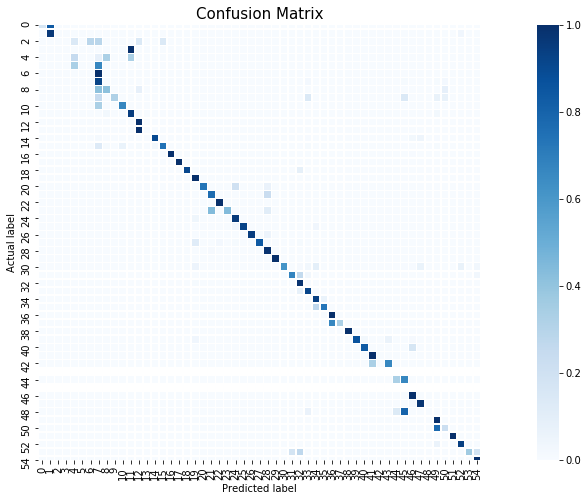

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
classes = list(range(0,62))
y=[]
y_pred = []

for i in range(labels_test.shape[0]):

  for j in range(len(classes)):

    if(labels_test[i][j]==1):
      y.append(j)
      #print(y)


print(len(y))
print(y[0])

#Confusion Matrix for testing data
cm_test = confusion_matrix(y, y_te_pred)
cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]  #To nomalize the confusion matrix

d_cm_test=np.diagonal(cm_test)
acc_score_test = accuracy_score(y, y_te_pred)

import seaborn as sns
f = plt.figure(figsize=(20,8))
ax=f.add_subplot(1,1,1)
sns.heatmap(cm_test, annot=False, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues',ax=ax, vmin=0, vmax=1)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
'Accuracy Score: {0}'.format(acc_score_test)
ax.set_title('Confusion Matrix', size = 15);
plt.show()

*Findings and/or Discussion/Results (For this section, avoid using the headings “Findings” or “Discussion”. Instead, create headings and sub-headings that identify the main issues or problems.)*

*Findings: What was found during the research or investigation. Gives the facts only – no   interpretation by the writer of the report. Tables, graphs or diagrams can be used. Must be relevant to the issues and problems identified in the Terms of Reference. Arranged in a logical order with headings and sub-headings. Discussion: You may also be required to analyse, interpret and evaluate the findings. The discussion draws together different parts of the findings and may refer to findings of other studies and/or theories.*


## **Conclusions:**
 Brief statements of the key findings of the report (full explanation is given in the Findings and/or Discussion). Arranged so the major conclusions come first. Should relate directly to the objectives set out in the Terms of Reference or Introduction



## **References**
A list of the sources that are used in and referred to in the report.
